Importing required libraries that will be used in project.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
import sqlite3
import datetime

# HOW TO DECOMPRESS ZIPPED DATA WITH gunzip
        gunzip name.of.file.gz
                OR
        gunzip *       (decompressed all files in folder! MAGIC)

In [4]:
csv_files = glob('zippedData/*.csv')
csv_files

['zippedData/tmdb.movies.csv',
 'zippedData/imdb.title.crew.csv',
 'zippedData/tn.movie_budgets.csv',
 'zippedData/imdb.title.ratings.csv',
 'zippedData/imdb.name.basics.csv',
 'zippedData/imdb.title.principals.csv',
 'zippedData/imdb.title.akas.csv',
 'zippedData/bom.movie_gross.csv',
 'zippedData/imdb.title.basics.csv']

RESULT : a list of file names decompressed; note - files are both CSV & TSV


In [5]:
files_dict = {}
for file in csv_files:
    file_cleaned = os.path.basename(file).replace(".csv", "").replace(".", "_")
    file_df = pd.read_csv(file)
    files_dict[file_cleaned] = file_df


1. Created an empt dictionary <br>
2. In each file in the list of file <br>
<t> a. clean the name of the file (ie; no '.' no 'zippedData/' etc) <br>
3. Add each clean named dictionary = to the pandas datafram of the data


In [6]:
files_dict.keys()

dict_keys(['tmdb_movies', 'imdb_title_crew', 'tn_movie_budgets', 'imdb_title_ratings', 'imdb_name_basics', 'imdb_title_principals', 'imdb_title_akas', 'bom_movie_gross', 'imdb_title_basics'])

In [7]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

                                                SEE ALL DF   
                Shows all the dataframes in the dictornary to call (in pd.Df format) THE KEYS

In [8]:
list(files_dict.values())

[       Unnamed: 0            genre_ids      id original_language  \
 0               0      [12, 14, 10751]   12444                en   
 1               1  [14, 12, 16, 10751]   10191                en   
 2               2        [12, 28, 878]   10138                en   
 3               3      [16, 35, 10751]     862                en   
 4               4        [28, 878, 12]   27205                en   
 ...           ...                  ...     ...               ...   
 26512       26512             [27, 18]  488143                en   
 26513       26513             [18, 53]  485975                en   
 26514       26514         [14, 28, 12]  381231                en   
 26515       26515      [10751, 12, 28]  366854                en   
 26516       26516             [53, 27]  309885                en   
 
                                      original_title  popularity release_date  \
 0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
 1      

In [9]:
files_dict['tmdb_movies'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [10]:
files_dict['tn_movie_budgets'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [11]:
files_dict['bom_movie_gross'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
files_dict['imdb_title_crew'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [13]:
files_dict['imdb_title_ratings'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
files_dict['imdb_name_basics'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [15]:
files_dict['imdb_title_principals'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [16]:
files_dict['imdb_title_akas'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [17]:
files_dict['imdb_title_basics'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [18]:
df1 = files_dict['tn_movie_budgets'].merge(files_dict['imdb_title_basics'], how='inner', left_on='movie', right_on='primary_title' )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 12 columns):
id                   3815 non-null int64
release_date         3815 non-null object
movie                3815 non-null object
production_budget    3815 non-null object
domestic_gross       3815 non-null object
worldwide_gross      3815 non-null object
tconst               3815 non-null object
primary_title        3815 non-null object
original_title       3814 non-null object
start_year           3815 non-null int64
runtime_minutes      3328 non-null float64
genres               3743 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 387.5+ KB


In [19]:
df = df1.merge(files_dict['imdb_title_crew'], how='inner', left_on='tconst', right_on='tconst')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 14 columns):
id                   3815 non-null int64
release_date         3815 non-null object
movie                3815 non-null object
production_budget    3815 non-null object
domestic_gross       3815 non-null object
worldwide_gross      3815 non-null object
tconst               3815 non-null object
primary_title        3815 non-null object
original_title       3814 non-null object
start_year           3815 non-null int64
runtime_minutes      3328 non-null float64
genres               3743 non-null object
directors            3727 non-null object
writers              3351 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 447.1+ KB


In [20]:
df.drop(['writers', 'start_year', 'original_title', 'primary_title', 'id'], axis=1, inplace=True)

In [21]:
df.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,93.0,Horror,nm3786927
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,136.0,"Action,Adventure,Fantasy",nm0551128
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,113.0,"Action,Adventure,Sci-Fi",nm1334526


In [22]:
df.production_budget = df.production_budget.str.replace('$', '').str.replace(',', '')
df.domestic_gross = df.domestic_gross.str.replace('$', '').str.replace(',', '')
df.worldwide_gross = df.worldwide_gross.str.replace('$', '').str.replace(',', '')
df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,93.0,Horror,nm3786927
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",nm0551128


In [23]:
df.production_budget = df.production_budget.astype(int)
df.domestic_gross = df.domestic_gross.astype(int)
df.worldwide_gross = df.worldwide_gross.astype(int)


In [24]:
df.drop_duplicates(subset='movie', inplace=True)


In [25]:
df['profit_margin'] = ((df['worldwide_gross'] - df["production_budget"]) / df['worldwide_gross']) * 100

In [26]:
df.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,93.0,Horror,nm3786927,84.692106
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",nm0551128,60.733080
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,113.0,"Action,Adventure,Sci-Fi",nm1334526,-133.703598


In [27]:
df.release_date = pd.to_datetime(df.release_date) 


In [28]:
df['Month'] =  df['release_date'].apply(lambda x: x.strftime('%m')) 

In [29]:
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin,Month
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,93.0,Horror,nm3786927,84.692106,12
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"Action,Adventure,Fantasy",nm0551128,60.733080,05
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113.0,"Action,Adventure,Sci-Fi",nm1334526,-133.703598,06
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,141.0,"Action,Adventure,Sci-Fi",nm0923736,76.436443,05
4,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,149.0,"Action,Adventure,Sci-Fi","nm0751577,nm0751648",85.352522,04


In [30]:
df.genres= df.genres.str.split(',')

In [31]:
df.genres.fillna('O', inplace=True)


In [32]:
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin,Month
0,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,93.0,[Horror],nm3786927,84.692106,12
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,136.0,"[Action, Adventure, Fantasy]",nm0551128,60.733080,05
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,113.0,"[Action, Adventure, Sci-Fi]",nm1334526,-133.703598,06
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",nm0923736,76.436443,05
4,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,149.0,"[Action, Adventure, Sci-Fi]","nm0751577,nm0751648",85.352522,04
...,...,...,...,...,...,...,...,...,...,...,...
3809,2001-07-06,Cure,10000,94596,94596,tt1872026,93.0,[Drama],nm0948107,89.428728,07
3811,1996-04-01,Bang,10000,527,527,tt6616538,NaN,O,"nm5674664,nm4419546",-1797.533207,04
3812,2012-01-13,Newlyweds,9000,4584,4584,tt1880418,95.0,"[Comedy, Drama]",nm0122653,-96.335079,01
3813,2018-12-31,Red 11,7000,0,0,tt7837402,77.0,"[Horror, Sci-Fi, Thriller]",nm0001675,-inf,12


In [33]:
all_genres = []
for genres in df.genres:
    for genre in genres:
        if genre not in all_genres:
            all_genres.append(genre)
        else:
            pass

all_genres

['Horror',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Western',
 'Animation',
 'Comedy',
 'Family',
 'Crime',
 'Drama',
 'Romance',
 'Mystery',
 'O',
 'History',
 'Sport',
 'Biography',
 'Documentary',
 'War',
 'Musical',
 'Music',
 'News']

In [34]:
for genre in all_genres:
    df[genre] = np.zeros(shape=df.shape[0])

In [35]:

for index, row in df.iterrows():
    if index % 100 == 0:
        print(index)
    for word in row['genres']:
        df.loc[index, word] = 1



0
100
200
300
400
500
600
700
800
1000
1100
1700
1800
2000
2100
2200
2500
2700
2900
3000
3200
3400


In [36]:
df = df.sort_values(['profit_margin'], ascending=False)

all_genres = []
for genres in df.genres[:200]:
    for genre in genres:
        all_genres.append(genre)

all_genres
# Create list of unique genres

proMargin_genre_count = {}
for genre in all_genres:
    proMargin_genre_count[genre] = all_genres.count(genre)
    

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 3751 to 3814
Data columns (total 34 columns):
release_date         2312 non-null datetime64[ns]
movie                2312 non-null object
production_budget    2312 non-null int64
domestic_gross       2312 non-null int64
worldwide_gross      2312 non-null int64
tconst               2312 non-null object
runtime_minutes      2138 non-null float64
genres               2312 non-null object
directors            2284 non-null object
profit_margin        2312 non-null float64
Month                2312 non-null object
Horror               2312 non-null float64
Action               2312 non-null float64
Adventure            2312 non-null float64
Fantasy              2312 non-null float64
Sci-Fi               2312 non-null float64
Thriller             2312 non-null float64
Western              2312 non-null float64
Animation            2312 non-null float64
Comedy               2312 non-null float64
Family               2312 non-null

In [38]:
df.drop(df[df['worldwide_gross'] == 0]. index, inplace=True)
# also did this one first if error 
# df.drop(df[df['worldwide_gross'] == 0]. index, inplace=True)

In [39]:
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin,Month,Horror,Action,Adventure,Fantasy,Sci-Fi,Thriller,Western,Animation,Comedy,Family,Crime,Drama,Romance,Mystery,O,History,Sport,Biography,Documentary,War,Musical,Music,News
3751,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,81.0,"[Horror, Mystery, Thriller]","nm4000389,nm3951039",99.759941,07,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3535,1942-08-13,Bambi,858000,102797000,268000000,tt2668120,58.0,"[Biography, Documentary]",nm0509852,99.679851,08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3452,1976-11-21,Rocky,1000000,117235147,225000000,tt3080284,136.0,"[Action, Comedy, Drama]",nm1126847,99.555556,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3400,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925486,184925486,tt7821084,49.0,"[Animation, Family]",nm8856734,99.195352,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3454,2012-01-06,The Devil Inside,1000000,53262945,101759490,tt1560985,83.0,[Horror],nm0068587,99.017291,01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df.directors = df.directors.str.split(',').str[0]

                                                   .
                                                   .
                                                   . 
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                CREATE GROUPBY WITH CLEAN DATAFRAMES
                                                   .
                                                   .
                                                   . 
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .

In [41]:
directors_df = df.groupby(['directors']).mean()
directors_df

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,profit_margin,Horror,Action,Adventure,Fantasy,Sci-Fi,Thriller,Western,Animation,Comedy,Family,Crime,Drama,Romance,Mystery,O,History,Sport,Biography,Documentary,War,Musical,Music,News
directors,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nm0000095,1.816667e+07,17779013.0,7.049560e+07,102.666667,69.928155,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.666667,0.0,0.000000,0.666667,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0
nm0000108,1.100000e+08,83526665.0,3.363031e+08,113.000000,53.787166,0.0,1.000000,0.500000,0.500000,0.5,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
nm0000110,8.833333e+07,111478193.0,3.088756e+08,111.333333,68.349085,0.0,0.666667,0.333333,0.333333,0.0,0.333333,0.0,0.0,0.000000,0.0,0.333333,0.666667,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
nm0000123,4.650000e+07,59497077.0,1.182193e+08,109.500000,63.152517,0.0,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.0,0.500000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
nm0000127,3.250000e+07,26462681.5,5.635853e+07,109.000000,4.437028,1.0,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nm9822619,8.000000e+06,52287414.0,5.228741e+07,91.000000,84.699951,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
nm9856424,8.500000e+06,13610521.0,2.028877e+07,77.000000,58.104911,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
nm9893430,2.000000e+07,81261177.0,1.319447e+08,NaN,84.842131,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [42]:
month_df = df.groupby(['Month']).mean()
month_df

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,profit_margin,Horror,Action,Adventure,Fantasy,Sci-Fi,Thriller,Western,Animation,Comedy,Family,Crime,Drama,Romance,Mystery,O,History,Sport,Biography,Documentary,War,Musical,Music,News
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,2.680376e+07,3.036607e+07,6.625542e+07,101.055556,-878.664311,0.139706,0.323529,0.147059,0.080882,0.044118,0.183824,0.007353,0.044118,0.294118,0.051471,0.147059,0.477941,0.073529,0.066176,0.022059,0.036765,0.007353,0.036765,0.066176,0.000000,0.000000,0.022059,0.000000
02,3.728532e+07,4.937448e+07,1.080380e+08,100.792308,-1398.777165,0.134752,0.276596,0.191489,0.092199,0.056738,0.212766,0.000000,0.056738,0.234043,0.021277,0.113475,0.439716,0.148936,0.113475,0.007092,0.021277,0.007092,0.070922,0.092199,0.028369,0.007092,0.028369,0.000000
03,4.519473e+07,5.222215e+07,1.230380e+08,102.475904,-1162.012953,0.067797,0.242938,0.231638,0.112994,0.096045,0.124294,0.011299,0.062147,0.265537,0.084746,0.141243,0.542373,0.152542,0.079096,0.005650,0.005650,0.022599,0.067797,0.050847,0.022599,0.011299,0.022599,0.000000
04,2.996661e+07,3.662896e+07,9.216675e+07,100.630682,-1243.969028,0.163158,0.194737,0.115789,0.052632,0.084211,0.152632,0.005263,0.042105,0.326316,0.063158,0.168421,0.473684,0.126316,0.068421,0.010526,0.036842,0.026316,0.057895,0.068421,0.021053,0.000000,0.015789,0.000000
05,6.013859e+07,7.138188e+07,1.852245e+08,103.602941,-6456.996171,0.089041,0.267123,0.253425,0.068493,0.116438,0.123288,0.000000,0.041096,0.328767,0.054795,0.109589,0.431507,0.150685,0.041096,0.006849,0.013699,0.020548,0.041096,0.095890,0.013699,0.006849,0.013699,0.000000
06,5.674262e+07,8.115789e+07,2.001523e+08,103.601266,-568.335604,0.059524,0.267857,0.267857,0.059524,0.119048,0.077381,0.000000,0.083333,0.351190,0.023810,0.107143,0.464286,0.107143,0.077381,0.011905,0.035714,0.017857,0.065476,0.077381,0.023810,0.011905,0.053571,0.000000
07,4.852893e+07,6.323883e+07,1.625193e+08,103.457516,-584.727779,0.092025,0.282209,0.251534,0.073620,0.122699,0.134969,0.006135,0.073620,0.392638,0.073620,0.085890,0.398773,0.141104,0.079755,0.018405,0.042945,0.012270,0.018405,0.085890,0.000000,0.006135,0.018405,0.000000
08,3.058178e+07,3.888917e+07,7.934778e+07,99.345679,-1113.643603,0.135294,0.282353,0.152941,0.058824,0.041176,0.188235,0.005882,0.047059,0.270588,0.041176,0.182353,0.488235,0.100000,0.058824,0.000000,0.011765,0.017647,0.082353,0.076471,0.023529,0.000000,0.064706,0.000000
09,2.554325e+07,2.809846e+07,5.990691e+07,101.747126,-3166.865200,0.141361,0.235602,0.109948,0.005236,0.062827,0.178010,0.005236,0.047120,0.230366,0.036649,0.151832,0.523560,0.172775,0.068063,0.010471,0.020942,0.031414,0.109948,0.089005,0.010471,0.005236,0.020942,0.005236


In [43]:
df3 = df.merge(files_dict['bom_movie_gross'], how='inner', left_on='movie', right_on='title')

In [44]:
df3.drop(['title', 'domestic_gross_y', 'foreign_gross', 'year', 'tconst'], axis=1, inplace=True)

In [45]:
vote_df = df.merge(files_dict['tmdb_movies'], left_on='movie', right_on='original_title', how='left')


In [46]:
vote_df.drop(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'title', 'release_date_y'], axis=1, inplace=True)

In [47]:
vote_df.drop_duplicates(subset='movie', inplace=True)
vote_df.head(2)

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin,Month,Horror,Action,Adventure,Fantasy,Sci-Fi,Thriller,Western,Animation,Comedy,Family,Crime,Drama,Romance,Mystery,O,History,Sport,Biography,Documentary,War,Musical,Music,News,popularity,vote_average,vote_count
0,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,81.0,"[Horror, Mystery, Thriller]",nm4000389,99.759941,07,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.166,4.8,591.0
1,1942-08-13,Bambi,858000,102797000,268000000,tt2668120,58.0,"[Biography, Documentary]",nm0509852,99.679851,08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [48]:
top_movie_profit = vote_df.groupby(['movie']).mean()['profit_margin'].sort_values( ascending=False)[:10]
top_movie_profit.head()

movie
The Gallows                        99.759941
Bambi                              99.679851
Rocky                              99.555556
Snow White and the Seven Dwarfs    99.195352
The Devil Inside                   99.017291
Name: profit_margin, dtype: float64

                                                   .
                                                   .
                                                   . 
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                CREATE GROUPBY WITH CLEAN GRAPHS
                                                   .
                                                   .
                                                   . 
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .
                                                   .

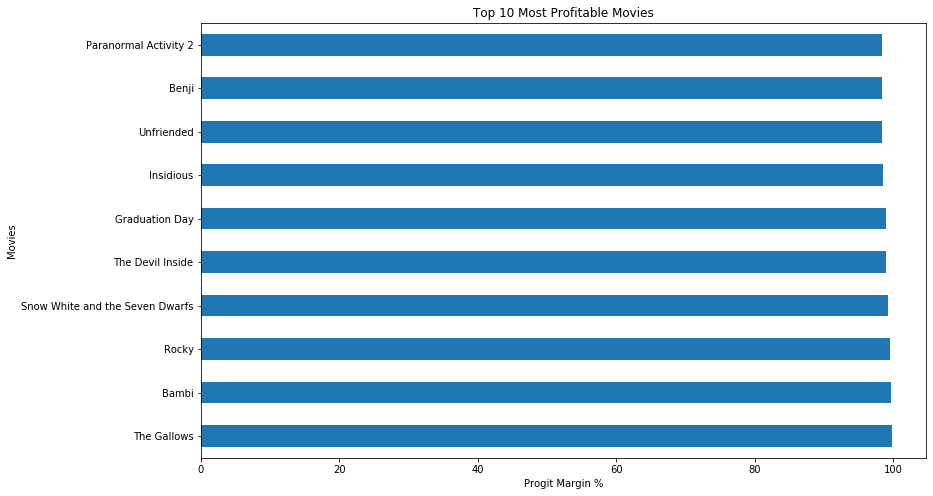

In [49]:
top_movie_profit.plot(kind='barh', figsize=(13,8))
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Progit Margin %')
plt.ylabel('Movies')
plt.show()

In [50]:

director_profit_df = df.groupby('directors')['profit_margin'].mean()
director_profit_df

directors
nm0000095      69.928155
nm0000108      53.787166
nm0000110      68.349085
nm0000123      63.152517
nm0000127       4.437028
                ...     
nm9822619      84.699951
nm9856424      58.104911
nm9893430      84.842131
nm9932335   -3103.789186
nm9949004      65.859617
Name: profit_margin, Length: 1586, dtype: float64

In [51]:
dir_top_20 = director_profit_df.sort_values(ascending=False)[:20]
dir_top_20

directors
nm4000389    99.759941
nm0509852    99.679851
nm1126847    99.555556
nm8856734    99.195352
nm0068587    99.017291
nm0831321    98.953712
nm0300174    98.446341
nm0131969    98.415694
nm0931095    98.309974
nm1406121    98.207659
nm1443502    98.042041
nm0662086    97.642161
nm1413364    97.585006
nm0910852    97.263562
nm5770452    97.212641
nm4318159    96.775886
nm1581380    96.639932
nm4691473    96.500000
nm1160962    96.499041
nm1491669    96.320721
Name: profit_margin, dtype: float64

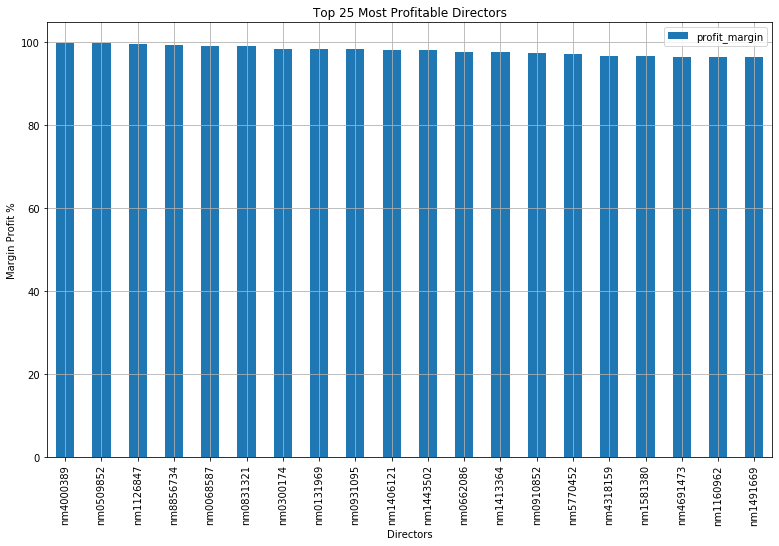

In [52]:
dir_top_20.plot(kind='bar', figsize=(13,8))
plt.title('Top 25 Most Profitable Directors')
plt.xlabel('Directors')
plt.ylabel('Margin Profit %')
plt.legend()
plt.grid(True)

plt.show()

In [53]:
month_gross_df = df.groupby(['Month'])['worldwide_gross'].mean()
month_gross_df

Month
01    6.625542e+07
02    1.080380e+08
03    1.230380e+08
04    9.216675e+07
05    1.852245e+08
06    2.001523e+08
07    1.625193e+08
08    7.934778e+07
09    5.990691e+07
10    6.804305e+07
11    1.638438e+08
12    1.499949e+08
Name: worldwide_gross, dtype: float64

In [54]:
month_gross_df.sort_values(ascending=False)

Month
06    2.001523e+08
05    1.852245e+08
11    1.638438e+08
07    1.625193e+08
12    1.499949e+08
03    1.230380e+08
02    1.080380e+08
04    9.216675e+07
08    7.934778e+07
10    6.804305e+07
01    6.625542e+07
09    5.990691e+07
Name: worldwide_gross, dtype: float64

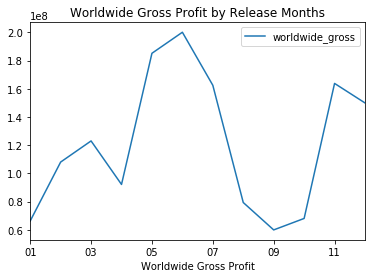

In [55]:
month_gross_df.plot(kind='line')
plt.title('Worldwide Gross Profit by Release Months')
plt.xlabel('Worldwide Gross Profit')
plt.legend()
plt.show()

In [56]:
vote_df.head(3)

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,directors,profit_margin,Month,Horror,Action,Adventure,Fantasy,Sci-Fi,Thriller,Western,Animation,Comedy,Family,Crime,Drama,Romance,Mystery,O,History,Sport,Biography,Documentary,War,Musical,Music,News,popularity,vote_average,vote_count
0,2015-07-10,The Gallows,100000,22764410,41656474,tt2309260,81.0,"[Horror, Mystery, Thriller]",nm4000389,99.759941,07,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.166,4.8,591.0
1,1942-08-13,Bambi,858000,102797000,268000000,tt2668120,58.0,"[Biography, Documentary]",nm0509852,99.679851,08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1976-11-21,Rocky,1000000,117235147,225000000,tt3080284,136.0,"[Action, Comedy, Drama]",nm1126847,99.555556,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [57]:
top_vote_v_count = vote_df.groupby('movie').max().sort_values(['vote_count', 'vote_average'], ascending=False)['vote_average'][:25]

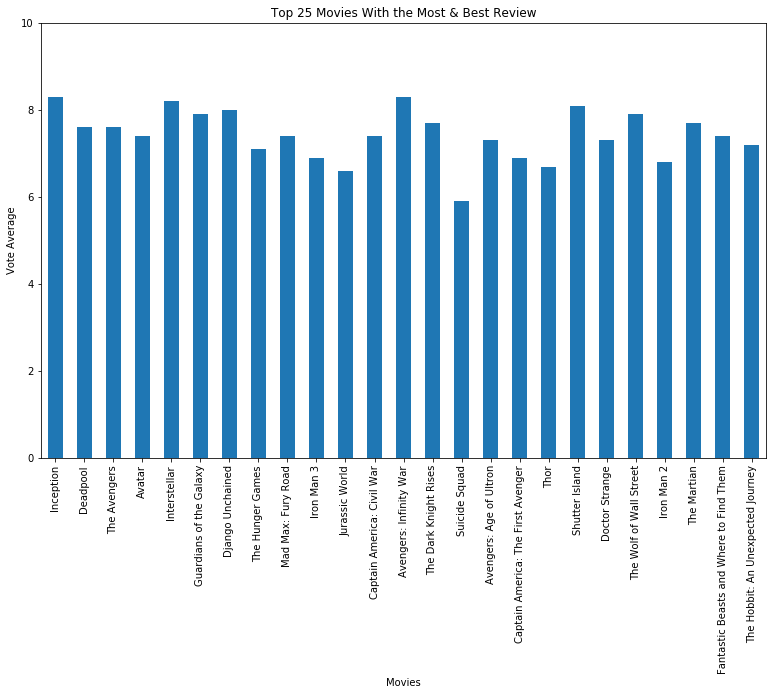

In [58]:
top_vote_v_count.plot(kind='bar', figsize=(13, 8))
plt.title('Top 25 Movies With the Most & Best Review')
plt.ylabel('Vote Average')
plt.xlabel('Movies')
plt.ylim([0,10])
plt.show()

                    MERGING ALL DF WITH GENRES
                    

In [59]:
df = popu_budget_gross.merge(files_dict['imdb_title_basics'], left_on='title', right_on='primary_title')

NameError: name 'popu_budget_gross' is not defined

In [ ]:
df.drop(['original_title', 'primary_title', "start_year", 'genre_ids', 'popularity'], axis=1, inplace=True)


In [ ]:
df

In [ ]:
df.genres = df.genres.str.replace(',', ' ').str.split()

In [ ]:
df.genres.fillna('N', inplace=True)

In [ ]:
genre_unique = []
for genres in df.genres:
    for genre in genres:
        if genre=='N':
            continue
        if genre not in genre_unique:
            genre_unique.append(genre)
genre_unique

In [ ]:
for genre in genre_unique:
    df[genre] = np.zeros(shape=df.shape[0])

In [ ]:
df.head()

In [ ]:
for index, row in df.iterrows():
    for word in row['genres']:
        if word != 'N':
            df.loc[index, word] = 1

# Add comments 


                                CREATING ACCURATE GROUPBY TABLES

In [ ]:
df_all = df.merge(files_dict['imdb_title_crew'], left_on='tconst', right_on='tconst')

In [ ]:
df_all.drop(['writers'], axis=1, inplace=True)

In [ ]:
df_all.directors = df_all.directors.str.split(',').str[0]

In [ ]:
df_all.rename(columns= {'Months_x': 'Months'}, inplace=True)


In [ ]:
df_all.info()

In [ ]:
df_all.tconst.duplicated().sum()

In [ ]:
df_all.drop_duplicates(subset='title', inplace=True)

In [ ]:
df_all.title.duplicated().sum()

In [ ]:
df_all.info()

In [ ]:
directors_stats = df_all.groupby(['directors'], sort=True).mean()
directors_stats

In [ ]:
directors_stats = df_all.groupby(['directors', 'title'], sort=False)['profit_margin_percent'].mean()
directors_stats.dropna(inplace=True)

In [ ]:
directors_stats.head()

# Which directors have the highest profit margins?
# Which directors have the higest worldwide gross?
# which directors have the highesst domestic gross?

In [ ]:
plt.style.use('seaborn-pastel')


In [ ]:
top_profitMargin_directors = directors_stats.sort_values(ascending=False).head(50)
top_profitMargin_directors

In [ ]:
top_profitMargin_directors.plot(kind='bar', figsize=(13, 8))
plt.title('Average Profit-Margin of Top 25 Directors')
plt.ylabel('Profit Margin')
plt.xlabel('Directors')
plt.grid(True)

In [ ]:
months_stats = df_all.groupby(['Months', 'Family']).mean()

In [ ]:
months_stats.head(10)
# what months have the highest domestic_gross?
# Which months have worldwide gross?
# which months have the highest domestic_gross?
# Which months have which genre highest release?

In [ ]:
studio_stats = df_all.groupby(['studio']).mean()

In [ ]:
studio_stats.head()
# What studios have the highest average profit_margin?
# Which studios have the biggest worldwide_gross?

                        TRYING TO CREATE GENRES COLUMN TO BETTER UNDERSTAND DATA VS GENRE
                                            COLUMNS IN ALL_IMDB_DF

In [ ]:
popu_budget_gross.head(3)

In [ ]:
popu_budget_gross.genre_ids = popu_budget_gross.genre_ids.str.replace(',', ' ').str.replace('[', '').str.replace(']', '').str.split()
popu_budget_gross.genre_ids

In [ ]:
popu_budget_gross.genre_ids.isnull().sum()

In [ ]:
popu_budget_gross.head()

In [ ]:
list_ids = []

for genre in popu_budget_gross.genre_ids:
    for ids in genre:
        if ids in list_ids:
            pass
        if ids not in list_ids:
            list_ids.append(ids)
            
list_ids


# for genre in all_imdb_df.genres:
#     list_of_genres = genre.split()
#     for x in list_of_genres:
#         if x == 'NONE':
#             pass
#         elif x not in all_genres:   
#             all_genres.append(x)
#         else:
#             pass


In [ ]:
for genre in list_ids:
    popu_budget_gross[genre] = np.zeros(shape=popu_budget_gross.shape[0])

In [ ]:
for index, row in popu_budget_gross.iterrows():
#     split_words = row['genres'].split()
    for ids in row['genre_ids']:
        popu_budget_gross.loc[index, ids] = 1

In [ ]:
popu_budget_gross.head()

                        TRYING TO CREATE GENRES COLUMN TO BETTER UNDERSTAND DATA VS GENRE
                                            COLUMNS IN ALL_IMDB_DF

In [ ]:
all_imdb_df.head(3)

In [ ]:
all_imdb_df.info()

In [ ]:
all_imdb_df.genres = all_imdb_df.genres.str.replace(',', ' ')

In [ ]:
all_imdb_df.genres.isnull().sum()

In [ ]:
all_imdb_df.genres.fillna('NONE', inplace=True)

In [ ]:
all_imdb_df.genres.isna().sum()

In [ ]:
all_genres = []
for genre in all_imdb_df.genres:
    list_of_genres = genre.split()
    for x in list_of_genres:
        if x == 'NONE':
            pass
        elif x not in all_genres:   
            all_genres.append(x)
        else:
            pass

        
        

all_genres


In [ ]:
for genre in all_genres:
    all_imdb_df[genre] = np.zeros(shape=all_imdb_df.shape[0])
    
                                
all_imdb_df.drop(['primary_title'], axis=1, inplace=True)


In [ ]:
all_imdb_df.info()

In [ ]:
all_imdb_df.genres.value_counts()

In [ ]:
# THIS IS TRIAL CODE!!!!! HOW TO SOLVE THE PROBLEM ABOUT ADDING VALUES TO COLUMNS

first_genres = ['Action', 'Adventure', 'Sci-Fi']
for genre in first_genres:
    all_imdb_df.loc[0, genre] = 0
    # all_imdb_df.loc[0, ]
all_imdb_df[['Action', 'Adventure', 'Sci-Fi']]

In [ ]:
for index, row in all_imdb_df.iterrows():
    if index %1000==0:
        print(index)
    split_words = row['genres'].split()
    for word in split_words:
        if word != "NONE":
            all_imdb_df.loc[index, word] = 1

# Add comments 


In [ ]:
pd.set_option('display.max_columns', 500)


In [ ]:
all_imdb_df

                                CREATING GROUPBY TABLES!!!! AND NAMES!!!
                                            popu/budget/gross
                                            all_im_df

In [ ]:
studio_sum_budgGross = popu_budget_gross.groupby(['studio', 'title', 'vote_average'])['foreign_gross', 'vote_count', 'production_budget_x', 'domestic_gross',
       'worldwide_gross_x'].sum()

In [ ]:
studio_sum_budgGross.head()

In [ ]:
months_money = popu_budget_gross.groupby(['Months_x', 'title']).mean()
months_money.head()

In [ ]:
popu_budget_gross.keys()

In [ ]:
popu_budget_gross.groupby(['14'])['budget_v_gross_percent_growth'].mean()

In [ ]:
all_imdb_df.keys()

In [ ]:
all_imdb_df.head()

In [ ]:
all_imdb_df.keys()

In [ ]:
genre_rates_avg = {}

for column in all_genres:
    x = all_imdb_df.groupby([column])['averagerating', 'numvotes'].mean()
    x_1 = x.drop([0])
    genre_rates_avg[column + "_rates"] = x_1
genre_rates_avg
    
